In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
sns.__version__

'0.11.0'

In [3]:
pd.set_option('display.max_columns', 89)
df = pd.read_csv("data.csv", index_col=0)
# df.describe()
# df.head(10)
# df.shape


In [4]:
df.isna().sum(axis = 0)

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [5]:
df.dropna(subset = ['Club'], inplace = True)

In [6]:
df.isna().sum(axis = 0)

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1323
Length: 88, dtype: int64

In [7]:
df.dropna(subset = ['Weak Foot'], inplace = True)
df.isna().sum(axis = 0)

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1275
Length: 88, dtype: int64

In [8]:
len(df['Name'].unique()),df.shape

(16924, (17918, 88))

In [9]:
df[df.duplicated()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


##### Ques 5 What is the age distribution in different clubs? Which club has most players young?

In [10]:
df.groupby(['Club'])
df.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

In [48]:
a = df.groupby('Club').agg({'Age': lambda x: ','.join([str(i) for i in list(x.values)])})
a.reset_index(inplace = True)
Threshold = df.Age.mean()
a['Count of Young Players'] = a['Age'].apply(lambda x: (np.array([int(i) for i in x.split(',')])<Threshold).sum())

In [49]:
a.head()

,Club,Age,Count of Young Players
0,SSV Jahn Regensburg,"32,33,29,25,25,29,25,25,26,28,27,26,24,22,23,3...",16
1,1. FC Heidenheim 1846,"32,27,30,27,31,29,23,27,31,25,23,24,27,25,23,2...",19
2,1. FC Kaiserslautern,"23,28,25,26,27,27,32,25,21,33,27,22,25,20,21,2...",18
3,1. FC Köln,"25,28,21,30,22,28,23,28,27,25,28,27,26,28,26,3...",16
4,1. FC Magdeburg,"31,27,26,30,32,30,22,24,21,30,21,25,29,27,23,2...",17


In [53]:
a.sort_values(['Count of Young Players'], ascending = False, inplace = True)
a.reset_index(drop = True, inplace = True)

In [54]:
a

,Club,Age,Count of Young Players
0,Barnsley,"25,23,25,24,25,23,23,25,22,25,24,25,23,23,25,2...",28
1,FC Sochaux-Montbéliard,"24,26,20,24,22,20,21,23,20,25,20,22,24,22,28,2...",26
2,RC Celta,"30,21,27,23,23,31,24,24,25,24,22,32,27,26,22,3...",26
3,Envigado FC,"22,29,21,23,23,25,24,23,21,23,21,25,23,21,20,2...",26
4,Chamois Niortais Football Club,"32,24,23,27,22,18,19,22,24,22,23,22,24,19,22,3...",25
...,...,...,...
646,Sport Club do Recife,"30,34,26,34,26,30,26,30,30,34,34,26,34,30,34,2...",0
647,Fluminense,"30,34,30,26,34,34,34,26,26,34,26,34,30,26,34,3...",0
648,Grêmio,"26,26,30,30,34,30,30,34,26,26,30,34,30,26,30,2...",0
649,Paraná,"30,26,34,34,34,34,34,30,30,34,30,34,34,26,26,2...",0


In [14]:
lst = []
lst1 = []
lst = list(a['Age'])
for i in range(0, len(lst)):
    lst1.append(lst[i].split(','))
for i in range(0, len(lst1)):
    for j in range(0, len(lst1[i])):
        lst1[i][j] = int(lst1[i][j])
#     lst2.append(i)

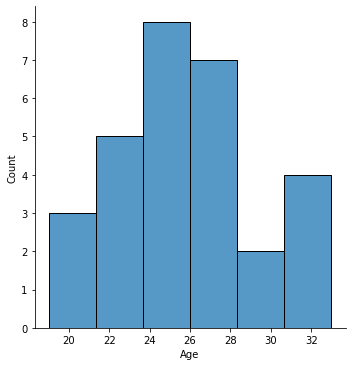

In [41]:
sns.displot(lst1[0], kind = 'hist').set(xlabel = 'Age')
plt.show()

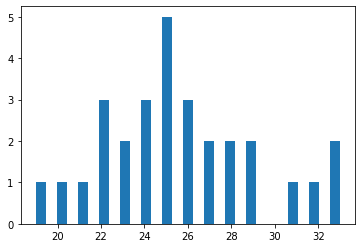

In [25]:
# fig, axs = plt.subplots(5, 10 figsize=(2, 5), sharex=True, sharey=True,
#                         tight_layout=True)
plt.hist(lst1[0], bins = 29)

# We can increase the number of bins on each axis
# axs[0].hist(x, y, bins=40)

# # As well as define normalization of the colors
# axs[1].hist(x, y, bins=40, norm=colors.LogNorm())

# # We can also define custom numbers of bins for each axis
# axs[2].hist(x, y, bins=(80, 10), norm=colors.LogNorm())

plt.show()


In [ ]:
# use seaborn dist, histogram

In [ ]:
# df.Age.min(), df.Age.max(), df.Age.median()
df.Age.describe()`

###### Ques 3

In [55]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [56]:
var_target = ['Potential']
var_traits = ['Special' , 'Skill Moves' , 'Weak Foot' , 'Work Rate' , 'Body Type' , 'Height', 'Weight', 'Age']
var_skills = ['Crossing' , 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [57]:
X_q3 = df.loc[:,var_skills]
Y_q3 = df.loc[:,var_target]
df['Position'].unique().shape

(27,)

In [58]:
# Flow
# 1. Split using scikit learn train/test
# 2. Validation data set
# 3. Standard Scalar
# 4. Model fitting
# 5. find coefficients
# 6. 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_q3, Y_q3, test_size=0.20, random_state=42)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
reg = LinearRegression().fit(X_train, y_train)

In [74]:
reg.coef_

array([[-1.61788302,  0.5478921 ,  1.13945704,  1.82315628, -0.3614602 ,
         1.88662932,  0.43734495, -0.47156303, -0.67354768,  2.75199811,
         1.11534432,  0.80630367, -0.73134546,  1.65165012, -0.36013183,
         0.66130839, -0.11758139, -0.55409977, -0.64831919, -0.88645469,
        -0.71805412, -1.00529752, -1.53520999,  0.33338697, -0.17955484,
         0.64478553,  0.46695781,  1.23550473,  0.39369515,  1.06917562,
         1.14720969,  0.21726344,  0.32653537,  0.93027116]])

In [80]:
list(X_q3.columns)

['Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [81]:
np.argsort(reg.coef_)

array([[ 0, 22, 21, 19, 12, 20,  8, 18, 17,  7,  4, 14, 24, 16, 31, 32,
        23, 28,  6, 26,  1, 25, 15, 11, 33, 29, 10,  2, 30, 27, 13,  3,
         5,  9]])

In [ ]:
df['Work Rate'].unique()

In [ ]:
my_dict = {'Messi': 9,
           'C. Ronaldo': 10, 
           'Neymar': 8, 
           'Lean': 9, 
           'Normal': 7,
           'Courtois': 7,
           'Stocky': 6, 
           'PLAYER_BODY_TYPE_25' : 1, 
           'Shaqiri' : 8, 
           'Akinfenwa' : 6}


In [ ]:
df['Body Type'] = df['Body Type'].apply(lambda x: my_dict.get(x))

In [ ]:
df['Weight'] = df['Weight'].apply(lambda x: np.float64(x.replace('lbs','')))
df['Weight']

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
X = df[['Work Rate']].values
enc.fit(X)

In [ ]:
temp_X = enc.transform(X)

In [ ]:
temp_X.toarray()

In [ ]:
enc.categories_

In [ ]:
temp_df = pd.DataFrame(data = temp_X.toarray(), columns = enc.categories_)

In [ ]:
temp_df

In [ ]:
df.drop(['Work Rate'], axis = 1, inplace = True)

In [ ]:
pd.concat([df,temp_df], axis=1).head(5)

##### Ques 1

In [ ]:
df.groupby(['Club']).mean().Overall

In [ ]:
df['Wage'] = df['Wage'].apply(lambda x: (x.replace('K','')))
df['Wage'] = df['Wage'].apply(lambda x: np.float64(x.replace('€','')))
df['Wage']

In [ ]:
df.groupby('Club').sum().Wage, df.groupby('Club').mean().Potential

In [ ]:
df['Wage'].describe()